# Lab6 Objects Inheritance, Poly, Encapsulation

## Inheritance

**Inheritance**, або устаткування це один із трьох 'китів' об'єкто-орієнтовної парадігми. Насправді - цих 'китів' можна рахувати як завгодно, деякі вказують 4, 5, 6 і т.д. в залежності від класифікації

Успаткування це механізм, завдяки якому одні класи, можуть успатковувати поведінку, або атрібути (поля, методи) інших класів. 

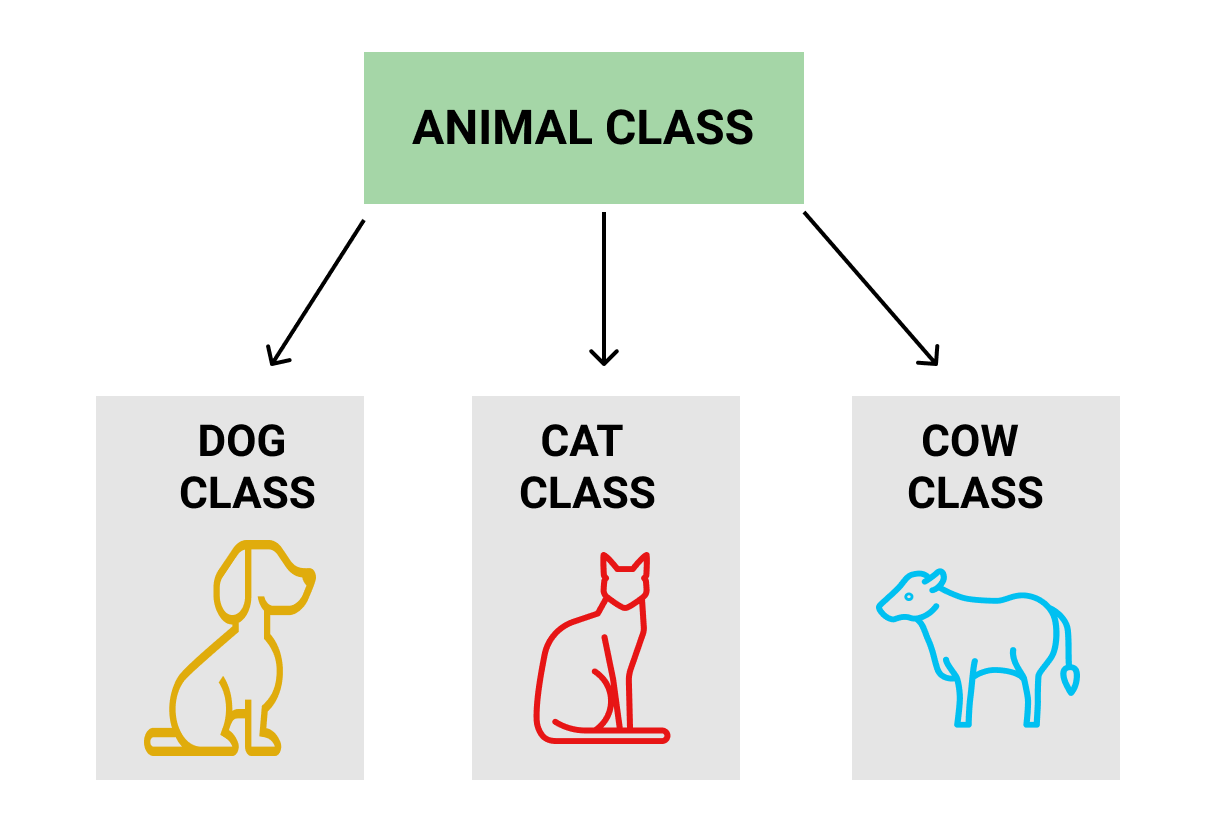

Клас, від якого успадковується поведінка називається батьківським класом (**parent**, або **super** у випадку `python`). Клас, що успадковує поведінку називається класом дитиною (**child**).

*Приклад нижче з мови програмування `Java`, проте вона показує їдею того, що класи наслідують поведінку - атрибути*

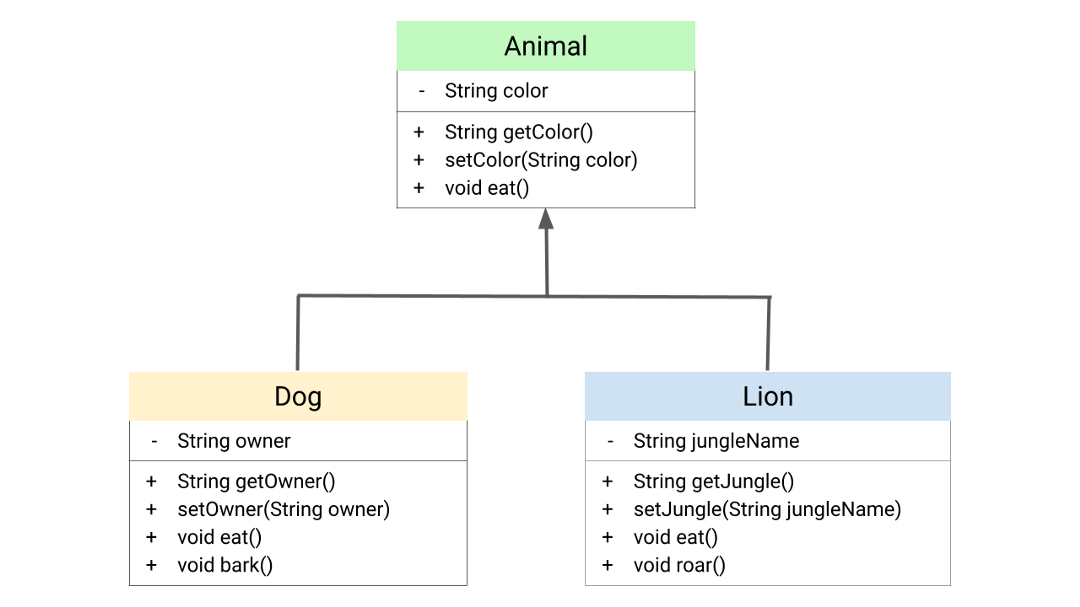

В мові програмування `python`, успадкування одним класом іншого позначається в момент об'явлення класу, таким чином:

In [8]:
class Animal:
    
    def __init__(self, name):
        self.name = name
    
    def eat(self, food):
        print(f"An Animal of class {self.__class__.__name__}"
              f" with name {self.name} is eating food {food}")

class Dog(Animal):
    
    def __init__(self, name):
        super().__init__(name)

In [9]:
animal = Animal("Bob")
animal.eat("Sandwich")

An Animal of class Animal with name Bob is eating food Sandwich


In [10]:
doh = Dog("Charlie")
doh.eat("Sausage")

An Animal of class Dog with name Charlie is eating food Sausage


Тобто, як ви можете побачити, клас `Dog` успадкувався від класу `Animal` і успадкував його поведінку та методи, і, відповідно, вам не треба імплементувати цю поведінку в даному класі.

Проте що таке `super` який був використаний в дитячому класі?

Давайте роздивимося ще один приклад, давайте напишемо код, який буде відображати геометричні фігури:

In [29]:
import math

class Rectangle:
    
    def __init__(self, height, width):
        self.h = height
        self.w = width
    
    def get_area(self):
        return self.w * self.h
    
    def get_perimeter(self):
        return 2 * self.w + 2 * self.h

class Square:
    
    def __init__(self, height):
        self.h = height
    
    def get_area(self):
        return self.h ** 2
    
    def get_perimeter(self):
        return self.h * 4

class Rhombus:
    
    def __init__(self, width, height, angle):
        self.w = width
        self.h = height
        self.phi = angle
    
    def get_area(self):
        return self.h * self.w * math.sin(math.radians(self.phi))
    
    def get_perimeter(self):
        return 2 * self.w + 2 * self.h
        

In [30]:
rect = Rectangle(5, 10)
print(rect.get_area(), rect.get_perimeter())

50 30


In [31]:
sq = Square(5)
print(sq.get_area(), sq.get_perimeter())

25 20


In [32]:
rh = Rhombus(7, 10, 60)
print(rh.get_area(), rh.get_perimeter())

60.6217782649107 34


Як ви бачите, дуже багато речей, які повторюють один одного, та їх можна б було не використовувати, користуючись успадкуванням. Так наприклад, користуючись успадкуванням виглядав би наш код:

По-перше, треба зробити базовий клас - `Polygon`, який би включав в себе більшість примітивів, які нам необхідно:

In [34]:
class Polygon:
    
    def __init__(self, width, height):
        self.h = height
        self.w = width
    
    def get_area(self):
        return self.w * self.h
    
    def get_perimeter(self):
        return 2 * self.w + 2 * self.h

class Square(Polygon):
    
    def __init__(self, height):
        super().__init__(height, height)

In [36]:
sq = Square(5)
sq.get_area()

25

Тут, ми використали `super()`, для того, щоб звернутися до базового класу `Rectangle`, щоб ініціювати його атрібутами, які необхідні базовому класу в `__init__`. 

Тобто, в першому наближенні, `super()` дозволяє вам звертатись до базового класу, щоб дістати його атрибути та методи, проте якщо ви ініціювали базовий клас в тілі класа, що успадковує поведінку, у вас і без цього є до них доступ, наприклад:

In [38]:
sq.w

5

In [39]:
sq.h

5

Проте, конструкція `super().__init__()` обов'язкова лише в випадках, коли ви хочете ініціювати чайлд клас, додавши йому додаткові атрибути, однак ви все ще зможете звертатися до `super()`, якщо ви цього не зробите:

In [40]:
class Cube(Square):
    def get_surface_area(self):
        face_area = super().get_area()
        return face_area * 6

    def get_volume(self):
        face_area = super().get_area()
        return face_area * self.h

In [42]:
cube = Cube(10)
cube.get_surface_area()

600

In [43]:
cube.get_volume()

1000

Таким чином ми імплементували два методи класа `Cube`. Обидва ці метода в своїх розрахунках спираються на `super().get_area()`, проте, миб могли також зробити це, користуючись `self.get_area()`:

In [44]:
class Cube(Square):
    def get_surface_area(self):
        face_area = self.get_area()
        return face_area * 6

    def get_volume(self):
        face_area = self.get_area()
        return face_area * self.h

In [45]:
cube = Cube(10)
cube.get_surface_area()

600

Типів успадкування є безліч, в залежності від фантазії розробника, взагалі їх розділяють на групи, які показані на діаграмі нижче, проте, ця класифікація доволі умовна.

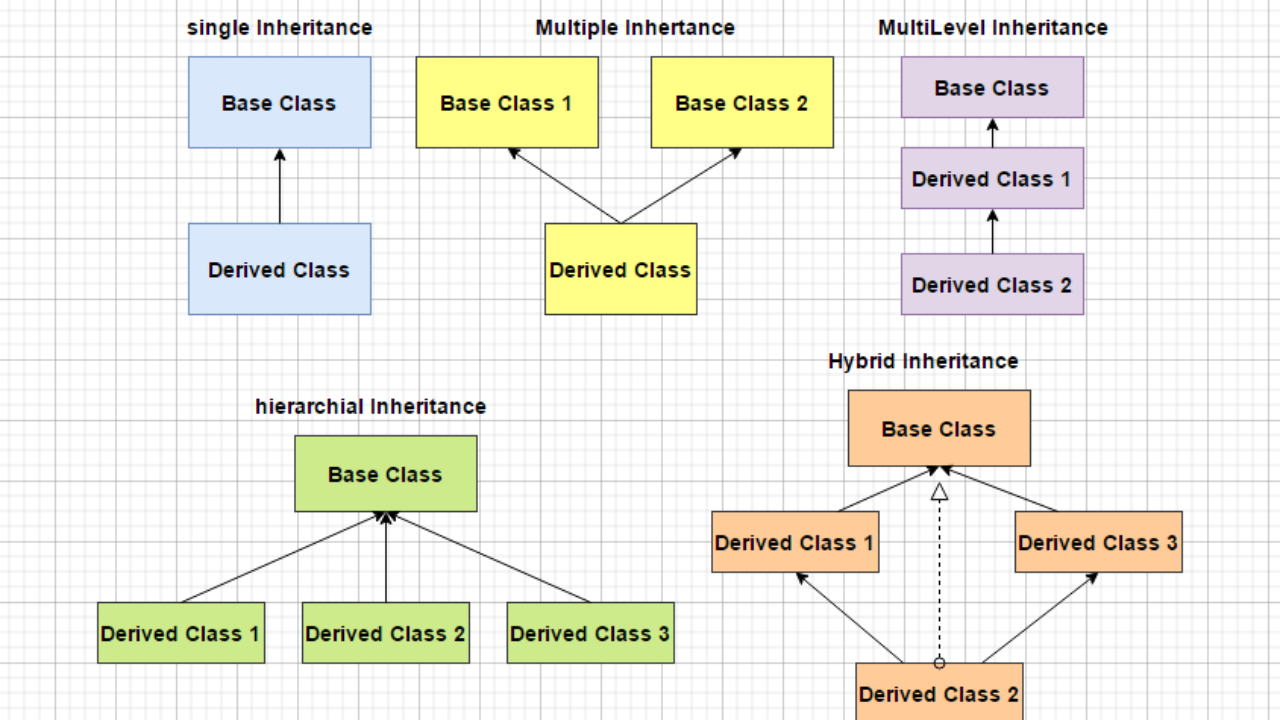

Також пайтон одна з мов програмування, яка підтримує подвійне (і більше) успадкування. Робиться це за допомогою наступного синтаксису:

In [1]:
class BaseClass1:
    pass

class BaseClass2:
    pass

class Child(BaseClass1, BaseClass2):
    pass

Для того, щоб подивитись від яких класів успадковується дитячій клас при використанні мульті-успадкування можна скористатися методом `mro()`, який є білтін і створюється для кожного класу:

Цей метод розшифровується як `method resolution order` - або порядок виконання методів. В попередній лекції ми розбирали, як саме пайтон отримує доступ до атрибутів класа, завдяки `mro`, пайтон ще має змогу обрати з якого із батьківськіх класів треба брати той чи інший атрібут, відповідно до порядку в `mro`.

In [2]:
Child.mro()

[__main__.Child, __main__.BaseClass1, __main__.BaseClass2, object]

## Polymorphism

Ще одним ключовим концептом ООП є **polymorphism** (поліморфізм). Отже, поліморфізм — це здатність (у програмуванні) представити той самий інтерфейс для різних базових форм (типів даних).

Здебільшого, на практиці цей концепт використовується в перевизначенні атрибутів для додання іншого функціоналу в класи, що успадковують властивості від інших класів.

Давайте повернемося до прикладу з геометричними фігурами:

In [ ]:
import math

class Polygon:
    
    def __init__(self, width, height):
        self.h = height
        self.w = width
    
    def get_area(self):
        return self.w * self.h
    
    def get_perimeter(self):
        return 2 * self.w + 2 * self.h

class Rhombus(Polygon):
    
    def __init__(self, width, height, phi):
        super().__init__(width, height)
        self.phi = phi
    
    def get_area(self):
        return self.h * self.w * math.sin(math.radians(self.phi))

In [6]:
rhomb = Rhombus(3, 4, 70)
print(rhomb.get_area())

11.2763114494309


Як ви можете побачити, ми перевизначили метод `get_area` для класу `Rhombus`, додавши йому іншу поведінку, відповідно до формули площі ромба. Також, ми додали новий атрибут - `phi`, який не застосовується до `Polygon` і є виключно атрібутом класа `Rhombus`.

Таким чином, поведінка класу `Rhombus` змінилася, не дивлячись на те що він успадкував цей метод він базового класу. Однак, ми все ще маємо доступ до методу базового класу, якщо ми звернемося до нього через `super()`

In [9]:
class Rhombus(Polygon):
    
    def __init__(self, width, height, phi):
        super().__init__(width, height)
        self.phi = phi
    
    def get_area(self):
        return self.h * self.w * math.sin(math.radians(self.phi))
    
    def foo(self):
        print(f"call to super method: {super().get_area() = }")
        print(f"call to self method: {self.get_area() = }")



rhomb = Rhombus(3, 4, 70)
rhomb.foo()

call to super method: super().get_area() = 12
call to self method: self.get_area() = 11.2763114494309


Завдяки інструментарія поліморфізма, у вас є можливість перевизначати будь які атрибути, будь то поля класа, методи, і так далі. 

Давайте роздивимось ще один приклад поліморфізма, для кращого розуміння матеріалу:

In [13]:
class Animal:
    
    def __init__(self, species, sound):
        self.species = species
        self.sound = sound
    
    def breathe(self):
        print(f"Animal {self.species} is breathing")
        
    def eat(self, food):
        print(f"Animal {self.species} is eating food {food}")
    
    def make_sound(self):
        print(f"Animal {self.species} is making sound {self.sound}")

class Cow(Animal):
    species = "cow"
    sound = "moo"
    
    def __init__(self, name):
        super().__init__(self.species, self.sound)
        self.name = name
        
    def eat(self, food):
        if food.lower() != "grass":
            print(f"Animal {self.species} cant eat given food: {food}")
        else:
            super().eat(food)

In [15]:
cow = Cow("burenka")
cow.eat("grass")
cow.make_sound()

Animal cow is eating food grass
Animal cow is making sound moo


In [20]:
class Dog(Animal):
    species = "dog"
    sound = "bark!"
    
    def __init__(self, name):
        super().__init__(self.species, self.sound)
        self.name = name
    
    def eat(self, food):
        if food.lower() != "meat":
            print(f"Animal {self.species} cant eat given food: {food}")
        else:
            super().eat(food)
    
    def defend(self, human):
        print(f"Dog with name {self.name} is defending human {human}")

In [23]:
dog = Dog("July")
dog.make_sound()
dog.eat("cucumber")
dog.defend("Mark")

Animal dog is making sound bark!
Animal dog cant eat given food: cucumber
Dog with name July is defending human Mark


## Encapsulation

Інкапсуляція - це також один із основних концептів ООП. Інакпсуляція состоїть в тому, що деякі атрибути класів, мають бути приховані від інших частин програми, оскількі ми не бажаємо, щоб інші частини коду, мали доступ до них.

Перефразуючи, інкапсуляція — це механізм обгортання даних (змінних) і коду, що діє на дані (методи), як єдине ціле. При інкапсуляції змінні класу будуть приховані від інших класів, і до них можна буде отримати доступ лише через методи їхнього поточного класу.

Розділяють три рівня "захисту" атрибутів класів:
* Публічні (public)
* Приватні (private)
* Захищені (protected)

### Public

Публічні методи, як це зрозуміло з назви, доступні в інших процедурах коду. Методи, які ми визначаємо як публічні, також можуть називатися інтерфейсами даного класу, тобто то, що може бути використано в інших процедурах коду.

Позначаються як ви позначали все раніше: 

`obj.public_attribute`

### Private

До приватних атрібутів є доступ лише зсередини класу. Тобто, цей атрибут не може бути використаний ні в інших частинах коду, ні навіть в `child` класах, якщо такі є в наявності, позначаються за допомогою двух підкреслень перед ім'ям атрибута:

`obj.__private_attribute`

### Protected 

До захищених атрибутів є доступ тількі з середини класу і всіх `child` класів якщо такі присутні, проте, зовні класу, до нього немає доступу. Позначаються за допомогою одного підкреслення:

`obj._protected_attribute`

Кожен з типів захисту атрибутів визначається кількістю underscores в імені даного атрибуту, наприклад:

In [24]:
class Test:
    
    def __init__(self):
        self.public_field = "public field"
        self._protected_field = "protected field"
        self.__private_field = "private field"

Що по факту значить ці підкресленя? Це означає, що коли ми створюємо той чи інший клас, ми самі визначаємо, які атрибути ми бажаємо скрити від іншого коду, а в які, ми навпаки, хочемо, щоб були публічні, та до яких має бути доступ в інших частинах кода.

In [25]:
class EncaupsulationExample:
    
    def __init__(self):
        self._protected_attr1 = "prot attr 1"
        self._protected_attr2 = "prot attr 2"
        self.__private_attr1 = "priv attr"
        
    def _protected_method(self):
        print(self._protected_attr1)
        
    def __private_method(self):
        print(self.__private_attr1)
    
    def interface(self):
        self._protected_method()
        self.__private_method()
        print("interface was executed!")

In [26]:
ex = EncaupsulationExample()
ex.interface()

prot attr 1
priv attr
interface was executed!


Однак, це все теорія, насправді, до всіх цих атрибутів, та методів є зовнішний доступ. Так зроблено спеціально, оскількі інсує **джентльменські угоди**. Заключаються вони в наступному - так ви можете використовувати приватні атрибути, захищені атрібути, але не робіть цього, якщо хтось закладував неможливість використання цього атрібута зовні, робити цього **НЕ ТРЕБА**. 

In [27]:
ex._protected_attr1

'prot attr 1'

In [32]:
ex._EncaupsulationExample__private_attr1

'priv attr'

Також, як і будь які атрибути, ці атрибути є в `__dict__` цього класу, і ви можете добратися до них:

In [33]:
ex.__dict__

{'_protected_attr1': 'prot attr 1',
 '_protected_attr2': 'prot attr 2',
 '_EncaupsulationExample__private_attr1': 'priv attr'}

In [34]:
EncaupsulationExample.__dict__

mappingproxy({'__module__': '__main__',
              '__init__': <function __main__.EncaupsulationExample.__init__(self)>,
              '_protected_method': <function __main__.EncaupsulationExample._protected_method(self)>,
              '_EncaupsulationExample__private_method': <function __main__.EncaupsulationExample.__private_method(self)>,
              'interface': <function __main__.EncaupsulationExample.interface(self)>,
              '__dict__': <attribute '__dict__' of 'EncaupsulationExample' objects>,
              '__weakref__': <attribute '__weakref__' of 'EncaupsulationExample' objects>,
              '__doc__': None})